# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name:  Yusuf Emir Cömert  
# Student ID:   2220765023  

In [41]:
# imports
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

Example Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| table1_id     | PK, int                          |
| table2_id     | FK REFERENCING tabl2, int                          |
| ...     | ...                         |



In [3]:
conn = sqlite3.connect('travel_agency.db')
cursor = conn.cursor()

bookingDetails = pd.read_csv('BookingDetails.csv')
feedbackDetails = pd.read_csv('FeedbackDetails.csv')


clients_df = bookingDetails[['CustomerID','CustomerName','CustomerEmail','CustomerPhone']]
airlines_df = bookingDetails[['AirlineID','AirlineName']]
flights_df = bookingDetails[['FlightID','AirlineID','Flight_Departure','Flight_Destination','Flight_Date']]
hotels_df = bookingDetails[['HotelID','HotelName','HotelLocation','HotelRating']]
bookings_df = bookingDetails[['BookingID','CustomerID','FlightID','HotelID',]]
feedback_df = feedbackDetails[['FeedbackID','CustomerID','AirlineID','HotelID','Review']]


In [4]:
# your code here
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Clients (
        CustomerID INTEGER PRIMARY KEY,
        CustomerName TEXT,
        CustomerEmail TEXT,
        CustomerPhone TEXT
);
''')
clients_df.to_sql('Clients',conn,if_exists='replace', index=False)

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Airlines (
        AirlineID INTEGER PRIMARY KEY,
        AirlineName TEXT
);
''')
airlines_df.to_sql('Airlines',conn,if_exists='replace', index=False)

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Flights (
        FlightID TEXT PRIMARY KEY,
        AirlineID INTEGER,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date DATE,
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID)
);
''')
flights_df.to_sql('Flights',conn,if_exists='replace', index=False)

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hotels (
        HotelID INTEGER PRIMARY KEY,
        HotelName TEXT,
        HotelLocation TEXT,
        HotelRating REAL
);
''')
hotels_df.to_sql('Hotels',conn,if_exists='replace', index=False)

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Bookings (
        BookingID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        booking_date DATE,
        FlightID TEXT,
        HotelID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (FlightID) REFERENCES Flights(FlightID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
);
''')
bookings_df.to_sql('Bookings',conn,if_exists='replace', index=False)

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Feedback (
        FeedbackID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        AirlineID INTEGER,
        HotelID INTEGER,
        Review TEXT,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
);
''')
feedback_df.to_sql('Feedback',conn,if_exists='replace', index=False)


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [5]:
# your code here
query = '''
SELECT Hotels.HotelName, COUNT(Bookings.BookingID) as NumBookings
FROM Hotels
JOIN Bookings ON Hotels.HotelID = Bookings.HotelID
GROUP BY Hotels.HotelID;
'''
#query = '''
#SELECT H.HotelName, COUNT(DISTINCT B.BookingID) as numBookings
#FROM Hotels H, Bookings B
#WHERE H.HotelID = B.HotelID
#GROUP BY H.HotelID
#'''
#Hocam I used distinct keyword here to remove duplicates 

cursor.execute(query)
result = cursor.fetchall()
result


[('Opal Motel', 121),
 ('Diamond Plaza', 36),
 ('Golden Suites', 256),
 ('Silver Villa', 100),
 ('Emerald Motel', 225),
 ('Sapphire Villa', 196),
 ('Jade Motel', 25),
 ('Jade Suites', 49),
 ('Pearl Resort', 144),
 ('Emerald Resort', 81),
 ('Golden Inn', 196),
 ('Jade Resort', 121),
 ('Silver Palace', 64),
 ('Silver Resort', 225),
 ('Diamond Villa', 100),
 ('Sapphire Villa', 64),
 ('Diamond Resort', 225),
 ('Pearl Hideaway', 64),
 ('Opal Suites', 81),
 ('Golden Retreat', 49),
 ('Opal Plaza', 100),
 ('Ruby Hideaway', 64),
 ('Opal Inn', 16),
 ('Diamond Inn', 196),
 ('Jade Suites', 100),
 ('Sapphire Hideaway', 100),
 ('Pearl Lodge', 25),
 ('Golden Resort', 144),
 ('Diamond Suites', 100),
 ('Golden Resort', 36),
 ('Jade Lodge', 81),
 ('Golden Hideaway', 81),
 ('Opal Motel', 16),
 ('Diamond Inn', 225),
 ('Ruby Plaza', 64),
 ('Ruby Palace', 64),
 ('Jade Retreat', 81),
 ('Pearl Motel', 49),
 ('Crystal Motel', 121),
 ('Sapphire Suites', 121),
 ('Silver Hideaway', 121),
 ('Pearl Plaza', 64),
 ('

## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [6]:
# your code here
cursor.execute('''
SELECT DISTINCT C.CustomerName, C.CustomerEmail, C.CustomerPhone
FROM Clients C
JOIN Feedback F1 ON C.CustomerID = F1.CustomerID
JOIN Feedback F2 ON C.CustomerID = F2.CustomerID AND F1.FeedbackID <> F2.FeedbackID
JOIN Airlines A1 ON F1.AirlineID = A1.AirlineID
JOIN Airlines A2 ON F2.AirlineID = A2.AirlineID
JOIN Hotels H1 ON F1.HotelID = H1.HotelID
JOIN Hotels H2 ON F2.HotelID = H2.HotelID
WHERE (F1.AirlineID IS NOT NULL AND F2.AirlineID IS NOT NULL)
  AND (F1.HotelID IS NOT NULL AND F2.HotelID IS NOT NULL);
''')
result = cursor.fetchall()
result

[]

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [25]:
# your code here
cursor.execute('''
SELECT HotelName, HotelRating
FROM Hotels
WHERE HotelRating < 
               (SELECT AVG(DISTINCT HotelRating) FROM Hotels)
''')
result = cursor.fetchall()
result

[('Pearl Resort', 2.0),
 ('Ruby Palace', 1.0),
 ('Golden Resort', 1.0),
 ('Sapphire Suites', 2.0),
 ('Opal Plaza', 2.0),
 ('Diamond Plaza', 2.0),
 ('Diamond Inn', 2.0),
 ('Golden Resort', 1.0),
 ('Jade Resort', 2.0),
 ('Golden Lodge', 2.0),
 ('Opal Plaza', 2.0),
 ('Jade Motel', 2.0),
 ('Jade Resort', 2.0),
 ('Sapphire Villa', 2.0),
 ('Opal Plaza', 2.0),
 ('Opal Suites', 1.0),
 ('Opal Inn', 1.0),
 ('Pearl Lodge', 1.0),
 ('Sapphire Suites', 2.0),
 ('Pearl Lodge', 1.0),
 ('Pearl Plaza', 2.0),
 ('Opal Suites', 1.0),
 ('Opal Plaza', 2.0),
 ('Sapphire Villa', 2.0),
 ('Silver Palace', 2.0),
 ('Golden Resort', 1.0),
 ('Jade Resort', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Diamond Plaza', 2.0),
 ('Golden Resort', 1.0),
 ('Diamond Inn', 2.0),
 ('Diamond Plaza', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Diamond Plaza', 2.0),
 ('Pearl Hideaway', 1.0),
 ('Opal Motel', 1.0),
 ('Sapphire Suites', 2.0),
 ('Opal Suites', 1.0),
 ('Diamond Plaza', 2.0),
 ('Sapphire Suites', 2.0),
 ('Jade Resort', 2.0),
 ('Jade Resor

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [26]:
# your code here
cursor.execute('''
SELECT C.CustomerName, COUNT(DISTINCT B.BookingID) as NumBookings
FROM Clients C
JOIN Bookings B ON C.CustomerID = B.CustomerID
JOIN Hotels H ON B.HotelID = H.HotelID
JOIN Flights F ON B.FlightID = F.FlightID
GROUP BY C.CustomerID
HAVING COUNT(DISTINCT H.HotelID) >= 3 AND COUNT(DISTINCT F.AirlineID) >= 2;

''')
#This code's logic seems correct but it does not returns anything. I dont know why,
#maybe it is because the datas are not provided well idk. 
result = cursor.fetchall()
result


[]

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [9]:
# your code here
#cursor.execute('''
#SELECT DISTINCT C.CustomerName, C.CustomerEmail, C.CustomerPhone
#FROM Clients C
#WHERE EXISTS (
#    SELECT 1
#    WHERE F1.CustomerID = C.CustomerID
#      AND EXISTS (
#          SELECT 1
#          FROM Feedback F2
#          WHERE F2.CustomerID = C.CustomerID
#            AND F1.AirlineID <> F2.AirlineID
#            AND F1.HotelID <> F2.HotelID
#      )
#);
#''')
#result = cursor.fetchall()
#result

# I just tried something here and I couldn't delete it because it does not working. :)

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [10]:
# your code here
titanic_df = pd.read_csv('titanic.csv')

pivot_table = titanic_df.pivot_table('Survived', index='Sex', columns='Pclass')
pivot_table

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


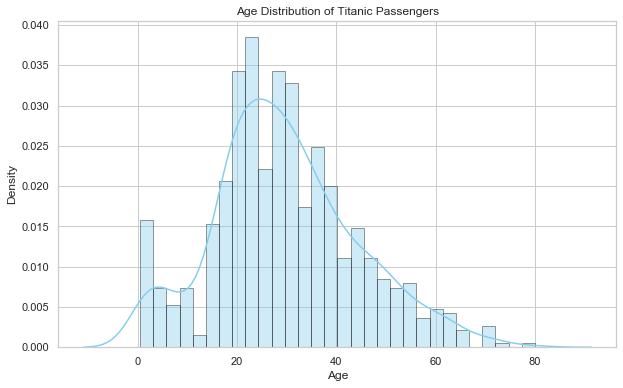

In [11]:
# your code here
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.distplot(titanic_df['Age'].dropna(), bins=30, kde=True, color='skyblue', hist_kws={'edgecolor': 'black'})

plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

AttributeError: module 'seaborn' has no attribute 'histplot'

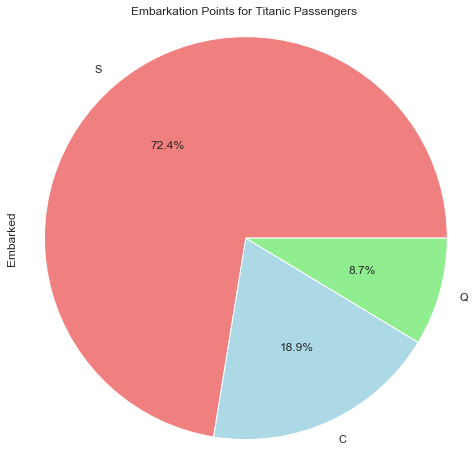

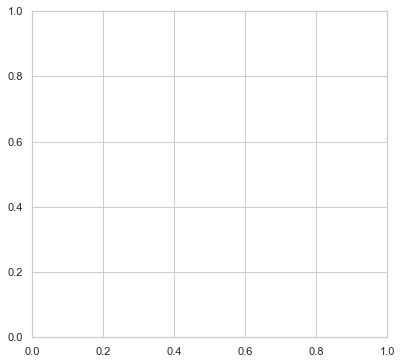

In [40]:
# your code here

plt.figure(figsize=(8, 8))
titanic_df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Embarkation Points for Titanic Passengers')
plt.axis('equal') 

# Identify the port with the highest boarding
highest_boarding_port = titanic_df['Embarked'].value_counts().idxmax()

# Filter DataFrame for passengers from the highest boarding port
port_passengers = titanic_df[titanic_df['Embarked'] == highest_boarding_port]

# Analyze the age and sex distribution from this port
plt.figure(figsize=(14, 6))

# Subplot for age distribution
plt.subplot(1, 2, 1)
sns.histplot(port_passengers['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution from the Highest Boarding Port')

# Subplot for sex distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=port_passengers, palette='pastel')
plt.title('Sex Distribution from the Highest Boarding Port')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

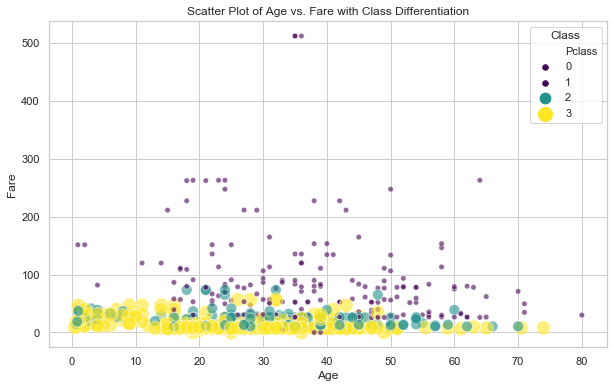

In [30]:
# your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, alpha=0.6, hue='Pclass', palette='viridis', size='Pclass', sizes=(30, 200))

plt.title('Scatter Plot of Age vs. Fare with Class Differentiation')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Class')

plt.show()


<div style="font-size: large; color: yellow;">
    <ul>
        <li> The scatter plot visualizes the relationship between the age and fare of Titanic passengers, with differentiation by passenger class
        <li>
        The points are color-coded by passenger class, with the Class 1, 2, and 3. It seems like first-class passengers (Class 1) generally paid higher fares compared to second and third-class passengers.
        <li>
        Ages are well distributed in the table.
    <ul>    
</div>

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


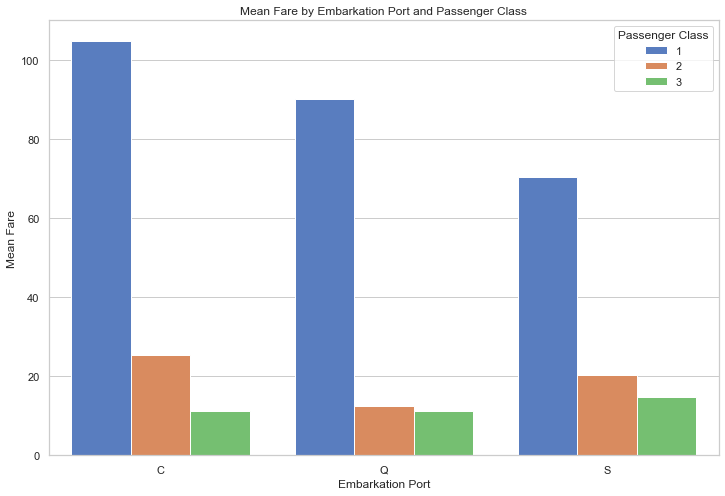

In [28]:
# your code here
embarked_pclass_fare = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=embarked_pclass_fare, palette='muted')

plt.title('Mean Fare by Embarkation Port and Passenger Class')

plt.xlabel('Embarkation Port')
plt.ylabel('Mean Fare')
plt.legend(title='Passenger Class')
plt.show()

<div style="font-size: large; color: yellow;">
    <ul>
        <li> The bar chart illustrates the mean fare for each combination of 'Embarked' and 'Pclass'
        <li> Passengers who boarded in 'C' had the highest mean fares, especially noticeable in the first class. Second fare is higher than the other ports but the third fare is lower that the 'S's third fare.
        <li> 'Q' has the medium fare for the first class bot for the others, it looks like lowest.
        <li> 'S' has the lowest first fare but medium level compared to the others.
        
</div>

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
